# Análisis de Datos de Airbnb en Santiago de Chile: Tendencias y Perspectivas

## Introducción

En este análisis, exploraré un conjunto de datos de Airbnb correspondiente a Santiago de Chile, con el objetivo de identificar las principales tendencias y patrones en el mercado de alquileres a corto plazo en la ciudad. Mi enfoque será generar insights valiosos que puedan beneficiar tanto a anfitriones como a huéspedes. Durante el análisis, buscaré responder a preguntas clave como:

- ¿Cuál es la distribución de los precios de las propiedades?
- ¿Cuáles son los tipos de habitaciones más populares en la plataforma?
- ¿Existen diferencias en los precios según el tipo de habitación o la ubicación?
- ¿Cómo varían las reseñas a lo largo del tiempo y qué factores podrían influir en ellas?

Este estudio proporcionará una visión integral del mercado de Airbnb en Santiago, útil para optimizar decisiones tanto para quienes alquilan sus propiedades como para quienes buscan hospedaje.


## ¿Qué es Airbnb?

Airbnb es una plataforma estadounidense de alquiler de propiedades a corto plazo que conecta a anfitriones que desean alquilar sus espacios con viajeros que buscan alojamiento. Fundada en San Francisco, Airbnb permite a los usuarios reservar estancias en hogares, apartamentos, y otros tipos de alojamientos a nivel mundial. Los anfitriones pueden listar sus propiedades y los huéspedes pueden reservarlos a través de la web o la aplicación móvil de Airbnb. La empresa no posee los alojamientos listados; en cambio, genera ingresos a través de comisiones por cada reserva realizada.

En cuanto al mercado chileno, especialmente en Santiago, Airbnb ha tenido un crecimiento significativo en los últimos años. La plataforma ofrece una alternativa a los hoteles tradicionales, con una amplia variedad de opciones que van desde habitaciones privadas en apartamentos hasta casas completas, lo que permite a los viajeros una experiencia más personalizada y, a menudo, más económica.

En este análisis, me centraré en los datos de Airbnb de Santiago, observando la distribución de los precios, los tipos de habitación más comunes, las tendencias geográficas de las publicaciones, y el impacto temporal de las reseñas sobre el comportamiento de los usuarios. A través de este análisis, busco obtener información valiosa sobre las dinámicas del mercado de alquileres a corto plazo en la ciudad.


## 1. Preparación de Datos
Para este análisis utilicé Pandas, NumPy, Matplotlib y Seaborn. A continuación, te explico cómo preparé los datos:

#### 2. Verificación de Datos Duplicados y Ausentes
No encontré datos duplicados, pero sí valores faltantes en las columnas last_review, price, license y neighbourhood_group. Procedí a manejar estos datos de la siguiente manera:

- Eliminé la columna neighbourhood_group, ya que todos los valores eran nulos.
- Eliminé license por tener demasiados valores nulos y no ser relevante para el análisis.
- Formateé last_review con el tipo de dato date_time y rellené los valores nulos con la media de las fechas.
- Rellené los valores nulos en reviews_per_month con 0, asumiendo que los registros sin reseñas no tienen valor en esa columna.
- Eliminé las filas con valores nulos en price.

#### 3. Manejo de Outliers
Tras revisar las estadísticas descriptivas, identifiqué outliers en price. Utilicé la técnica del rango intercuartílico (IQR) para eliminarlos y asegurar que los datos fueran representativos.

#### 4. Filtrado del Dataset
Finalmente, creé un nuevo conjunto de datos sin los outliers y los valores faltantes, dejándolos listos para el análisis.
Con estos pasos, los datos quedaron preparados para extraer insights y realizar un análisis detallado del mercado de Airbnb en Santiago de Chile.


## Entendimiento de los Datos
El conjunto de datos fue obtenido de Insideairbnb.com. Este incluye:

Listados, con descripciones completas y puntuación promedio de las reseñas.
Reseñas, con un ID único para cada revisor.

El conjunto de datos con el que trabajé principalmente es el de Listados, que consta de 11,792 filas y 16 columnas.

------

## 1. Inicialización

In [7]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leer datasets 
listings = pd.read_csv('data/processed/listings_processed.csv')

En vista de que los datos ya han sido procesados y moldeados en un archivo distinto, pasaré directo al análisis exploratorio.

## 2.. Distribución de Precios
- Visualizar la distribución de precios de los anuncios

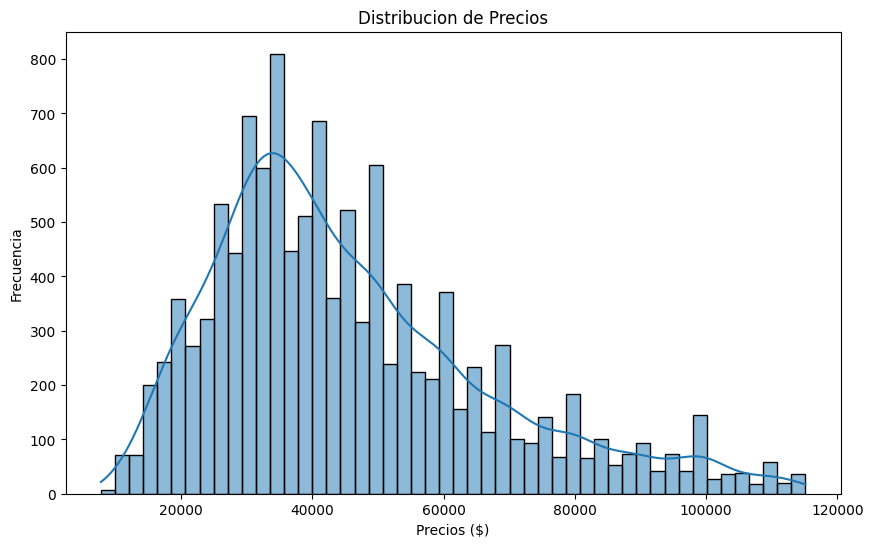

In [38]:
# Graficar la distribucion de precios en los anuncios
plt.figure(figsize=(10, 6))
sns.histplot(listings['price'], bins=50, kde=True)
plt.title('Distribucion de Precios')
plt.xlabel('Precios ($)')
plt.ylabel('Frecuencia')
plt.show()

#### Distribución de Precios

- Distribución sesgada a la derecha: hay más datos concentrados entre los 20.000 y 60.000 CLP, con una "cola larga" hacia valores más altos.
- Tendencia en torno a 35.000–40.000 CLP: ahí se encuentra el pick más alto de frecuencias.

## 3. Análisis de Tipo de Habitación
- Analizar la distribución de los diferentes tipos de habitaciones

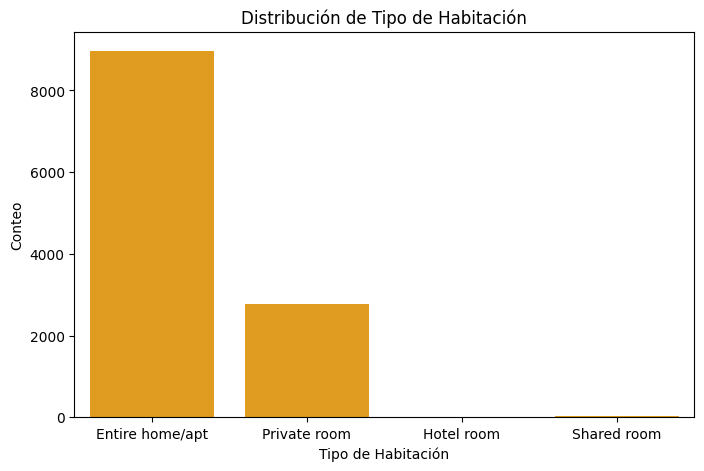

In [40]:
# Garficar  la distribucion por tipo de habitacion
plt.figure(figsize=(8, 5))
sns.countplot(x='room_type', data=listings , color='orange')
plt.title('Distribución de Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Conteo')
plt.show()

#### Distribución de tipo de habitaciones listadas:
La mayoría de las habitaciones disponibles son casas enteras, seguidas por habitaciones privadas. En cambio, las habitaciones de hotel y las habitaciones compartidas son las menos frecuentes. Este patrón podría reflejar una oferta más amplia de casas enteras y habitaciones privadas en el mercado, mientras que las habitaciones de hotel y compartidas son opciones menos comunes.

## 4. Precio vs. Tipo de Habitacion
- Visualizar la relación entre los precios y el tipo de habitación.

/var/folders/82/grjgs_q959j1pwfb817_nsl80000gn/T/ipykernel_11663/1049329214.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Tipo de Habitación')


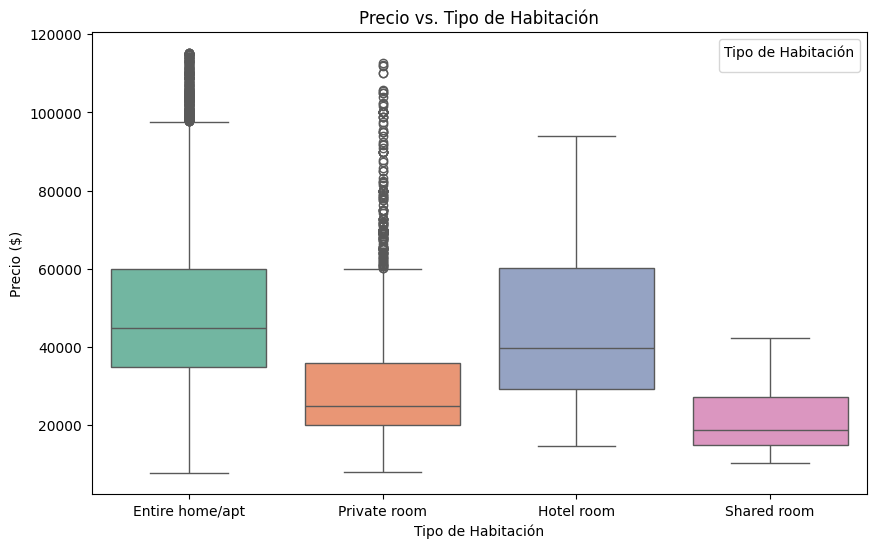

In [31]:
# Graficar la relación entre los precios y los tipos de habitaciones
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', hue='room_type', data=listings, palette='Set2')
plt.title('Precio vs. Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio ($)')
plt.legend(title='Tipo de Habitación')
plt.show()

#### Precios vs. tipo de habitación

Las casas y apartamentos enteros, junto con las habitaciones de hotel, presentan en promedio los precios más elevados. Sin embargo, en el caso de las casas enteras, se observa una gran variabilidad en los precios, que pueden elevarse significativamente.

Las habitaciones privadas, aunque tienen un precio promedio más bajo en comparación con las casas enteras y los hoteles, también muestran una amplia dispersión, con algunas opciones considerablemente más caras, probablemente dependiendo del vecindario donde se ubiquen.

Por último, las habitaciones compartidas suelen tener los precios más bajos del mercado.

## 5. Distribución de los Vecindarios
- Examinar la distribución de los anuncios entre los distintos vecindarios.

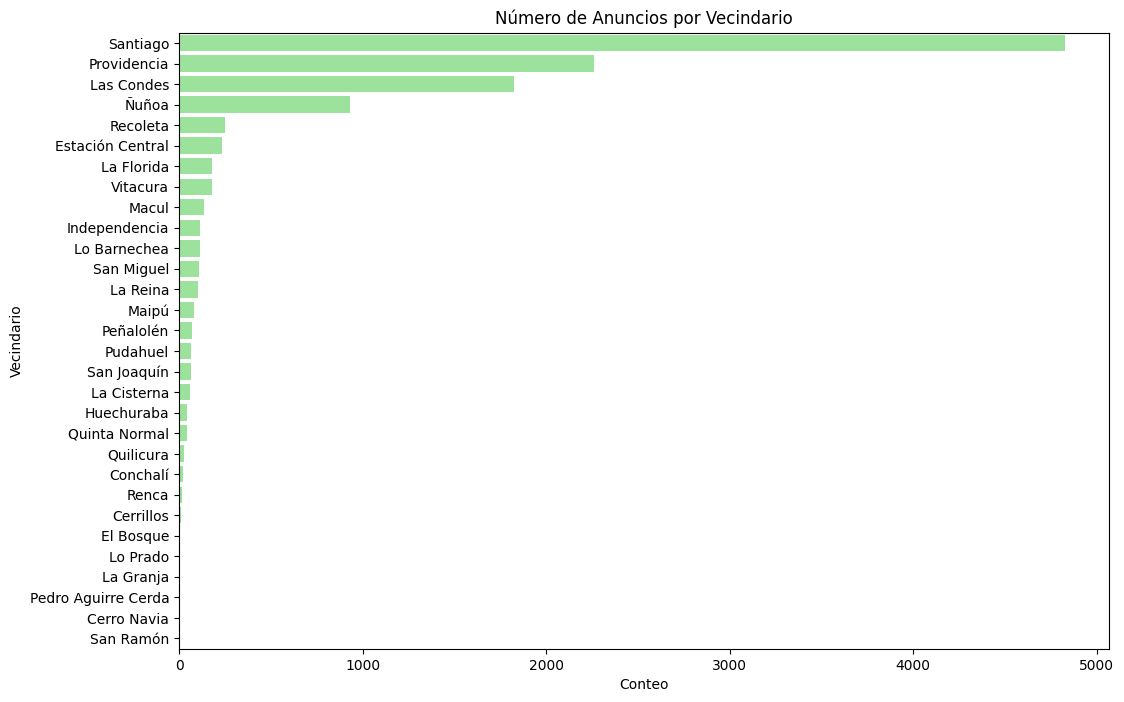

In [41]:
# Graficar la distribucion de anuncios en los vecindarios
plt.figure(figsize=(12, 8))
sns.countplot(y='neighbourhood', data=listings ,color="lightgreen" , order=listings['neighbourhood'].value_counts().index)
plt.title('Número de Anuncios por Vecindario')
plt.xlabel('Conteo')
plt.ylabel('Vecindario')
plt.show()

#### Distribución de los vecindarios
Este gráfico muestra cómo Santiago domina la escena, seguido por Providencia, Las Condes y Ñuñoa. Las demás zonas tienen una presencia mucho menor.

## 6. Reseñas a lo Largo del Período
- Visualizar el número de reseñas a lo largo del período analizado

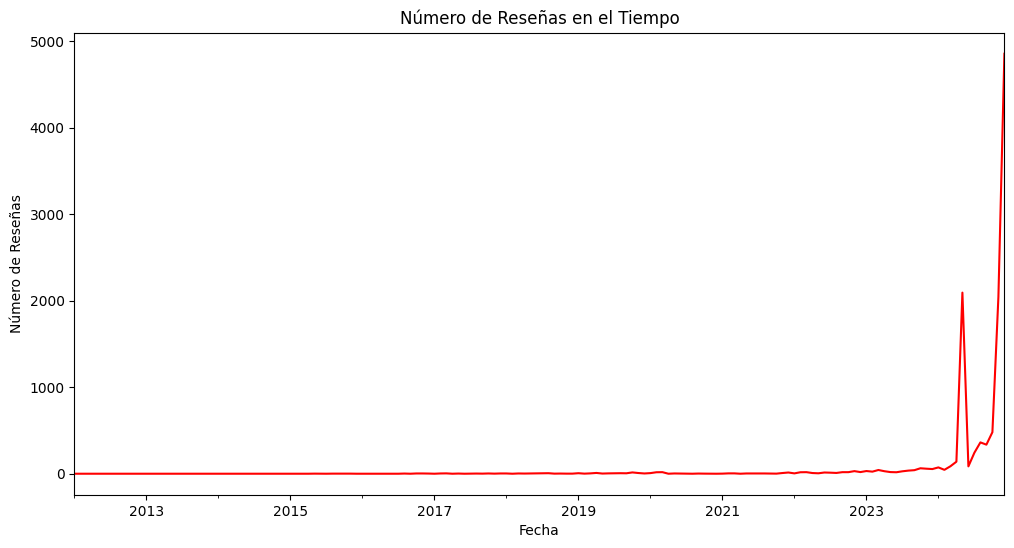

In [34]:
# Graficar el número de reseñas en el tiempo 
listings['last_review'] = pd.to_datetime(listings['last_review'])
reviews_over_time = listings.groupby(listings['last_review'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
reviews_over_time.plot(kind='line',color='red')
plt.title('Número de Reseñas en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Reseñas')
plt.show()

#### Reseñas a lo largo del período analizado
En este gráfico se observa un aumento significativo en la cantidad de reseñas a partir del año 2023, con un incremento aún mayor en 2024. Esto podría deberse al aumento de la popularidad de la aplicación Airbnb en los últimos años, así como a la eliminación de las restricciones de viaje impuestas en años anteriores.

## 7. Insights clave del Análisis Exploratorio del Dataset de Airbnb 📊
A continuación se presentan los hallazgos más relevantes obtenidos del análisis exploratorio de los datos de Airbnb en Santiago de Chile:

#### 1. Distribución de Precios

- La distribución de precios está sesgada a la derecha, con la mayoría de los valores concentrados entre los 20.000 y 60.000 CLP.
- El mayor número de publicaciones se concentra en un rango de precios cercano a los 35.000–40.000 CLP.
- Existen algunos valores significativamente más altos, lo que indica la presencia de publicaciones premium o fuera del promedio.

#### 2. Distribución del Tipo de Habitación

- La mayoría de las publicaciones corresponden a casas o apartamentos enteros, seguidos por habitaciones privadas.
- Las habitaciones compartidas y las habitaciones de hotel son considerablemente menos comunes.
- Este patrón sugiere que la oferta en Santiago se inclina fuertemente hacia alojamientos completos y privados, posiblemente reflejando las preferencias de los anfitriones y huéspedes.

#### 3. Precios según Tipo de Habitación

- Las casas/apartamentos enteros y las habitaciones de hotel presentan los precios promedio más elevados.
- Las casas enteras muestran una gran variabilidad de precios, con algunos alojamientos considerablemente más costosos.
- Las habitaciones privadas tienden a ser más accesibles, aunque también presentan cierta dispersión en precios, probablemente relacionada con su ubicación.
- Las habitaciones compartidas son, en general, la opción más económica.

#### 4. Distribución Geográfica de las Publicaciones

- Santiago concentra la mayoría de las publicaciones.
- Le siguen Providencia, Las Condes y Ñuñoa, aunque con una representación notablemente menor en comparación con la comuna de Santiago.
- Las demás comunas tienen una presencia mucho más reducida dentro del mercado.

#### 5. Tendencias Temporales en las Reseñas

- Se observa un incremento significativo en la cantidad de reseñas a partir del año 2023.
- Este aumento continúa en 2024, lo cual podría atribuirse al levantamiento de restricciones de viaje y al crecimiento de la popularidad de Airbnb en la región.


#### ✅ Conclusión

El análisis exploratorio revela que la mayoría de los alojamientos en Santiago están dentro de un rango de precios moderado, concentrándose especialmente en casas enteras y habitaciones privadas. Las casas completas suelen tener precios más altos y una mayor variabilidad, mientras que las habitaciones compartidas son la opción más económica. Santiago lidera claramente la oferta de alojamientos en la región, y se ha notado un crecimiento importante en la actividad de los usuarios desde 2023, lo que puede indicar una recuperación del turismo y una mayor adopción de la plataforma. Estos hallazgos pueden ser útiles tanto para anfitriones al definir sus estrategias de precios como para huéspedes al elegir la mejor opción según sus necesidades.